<a href="https://colab.research.google.com/github/glazedonut/IEClusteingAnalysisProject/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Roka Hosono, Veda Upasan Pedagadi, Jahnavi Chowdary Tumati
11/7/2022
Project 1: Cluster Analysis

C:\Users\hoson\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hoson\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


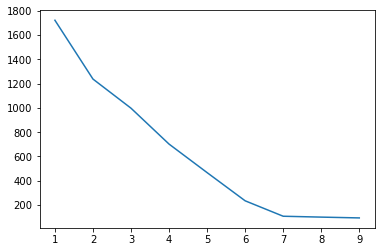

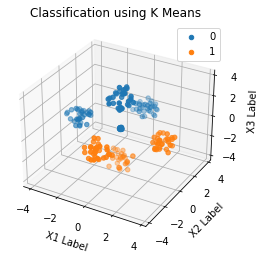

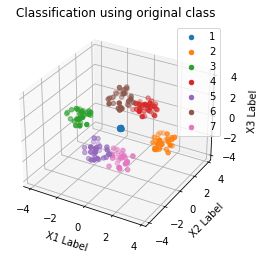

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
def intervention(indicies):
    interevent=[]
    for i in range(0,len(indicies)):
        if i==0:
            interevent.append(0)
        else:
            interevent.append(abs(indicies[i]-indicies[i-1]))
    return interevent
def create_K_meanselbow(file):
    data=pd.read_csv(file)
    coordinates=data[['X1','X2','X3']]
    inertia=[]
    for i in range(1,10):
        k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
        k_means.fit(coordinates)
        inertia.append(k_means.inertia_)
    
    sns.lineplot(np.arange(1,10), inertia)
    dydx=[]
    for i in range(len(inertia)):
        dydx.append(inertia[i] - inertia[i-1])
    max_index = intervention(dydx).index(max(intervention(dydx)))
    opt_k=KMeans(n_clusters=max_index+1,init='k-means++',random_state=42)
    metrics=opt_k.fit_predict(coordinates)
    data['cluster_class']=metrics
    return data
def create_3dscatter(data):    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Classification using K Means")
    for i in data.cluster_class.unique():
        data2=data.loc[data['cluster_class']==i]
        ax.scatter(data2['X1'], data2['X2'], data2['X3'],label=i)
    ax.set_xlabel('X1 Label')
    ax.set_ylabel('X2 Label')
    ax.set_zlabel('X3 Label')
    ax.legend()    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.set_title("Classification using original class")
    for i in data['Class'].unique():
        data2=data.loc[data['Class']==i]
        ax2.scatter(data2['X1'], data2['X2'], data2['X3'],label=i)
    ax2.set_xlabel('X1 Label')
    ax2.set_ylabel('X2 Label')
    ax2.set_zlabel('X3 Label')
    ax2.legend()

data=create_K_meanselbow("data/data1.csv")
create_3dscatter(data)